0.473679628749485
0.97305447481892
0.9883837487072682


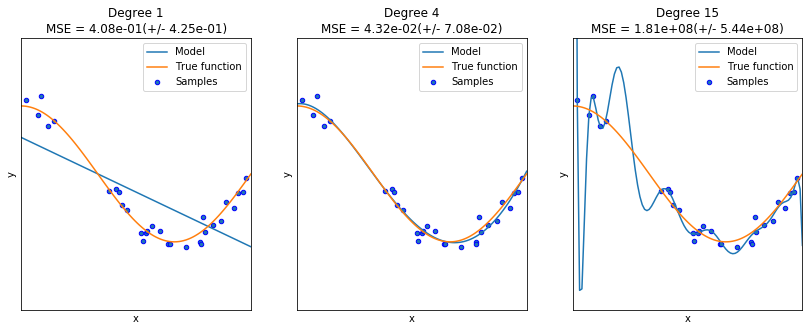

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples)) # 0, 1均匀分布随机样本
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    ax.set_xticks([])
    ax.set_yticks([]) # 设置y轴主刻度(刻度点,刻度值,网格线)均不可见
    standard_scaler = StandardScaler()
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    
    # 管道机制实现了对全部步骤的流式化封装和管理(依次运行各个估计器)
    # 除最终估计器之外的估计器必须实现fit and transform 方法
    # 管道机制要求最终估计器必须实现fit方法(最终估计器可以不含score等方法,若含有则可以通过Pipeline对象直接进行调用)
    # 若一个程序中含多个管道机制,每个管道的估计器必须重新设定,就算有些估计器参数完全一致
    pipeline = Pipeline([('standard_scaler', standard_scaler),
                        ("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)]) 
    pipeline.fit(X.reshape(-1, 1), y) # fit函数第一个参数的shape必须满足(n_samples, n_features)
    print(pipeline.score(X.reshape(-1, 1), y)) # LinearRegression带有score方法,故对象pipeline可直接进行调用
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [16]:
pipeline[0] # 第一个估计器

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# 也可以使用名称进行索引
pipeline['standard_scaler'] # 于上等价

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
pipeline[1] # 第二个估计器

PolynomialFeatures(degree=15, include_bias=False, interaction_only=False,
                   order='C')